# Best channel search

Realizando 20 rodadas de classificação com `KNN` no dataset `chb01dwt` para determinar com qual canal se obtém os melhores resultados.

## Importando biblioteca

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
chb_dwt_df = pd.read_csv('./chb01dwt.csv')

target_dwt_s = chb_dwt_df.pop('target')

random_seeds = np.random.randint(0, 9000, 20)

random_seeds

array([1151, 8106, 1727, 8106, 4846, 3632, 5143, 7416, 4743, 2367, 1822,
       5767, 4799, 3957, 5398, 4986, 1529, 3248, 5968, 5534])

## Realizando classificação por canal

In [3]:
channels_df = pd.DataFrame(columns=range(18))

for channel in range(18):

    channel_acc = []

    # X recebe apenas as colunas relacionadas ao canal da iteração
    X = chb_dwt_df[
        [column for column in chb_dwt_df.columns if (f'{channel}' in column.split('-'))]
    ].values
    y = target_dwt_s.values

    for seed in random_seeds:
        # Separando dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando classificador
        classifier = KNeighborsClassifier().fit(X_train, y_train)

        # Salvando acurácia da classificação
        channel_acc.append(classifier.score(X_test, y_test))
    
    channels_df[channel] = channel_acc

channels_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.869231,0.907692,0.884615,0.938462,0.853846,0.907692,0.884615,0.915385,0.884615,0.930769,0.930769,0.907692,0.884615,0.938462,0.915385,0.915385,0.876923,0.900000
1,0.876923,0.907692,0.915385,0.923077,0.846154,0.892308,0.900000,0.876923,0.907692,0.961538,0.930769,0.907692,0.861538,0.938462,0.953846,0.938462,0.938462,0.915385
2,0.892308,0.953846,0.938462,0.938462,0.900000,0.946154,0.900000,0.930769,0.900000,0.953846,0.938462,0.938462,0.869231,0.915385,0.892308,0.915385,0.884615,0.930769
3,0.876923,0.907692,0.915385,0.923077,0.846154,0.892308,0.900000,0.876923,0.907692,0.961538,0.930769,0.907692,0.861538,0.938462,0.953846,0.938462,0.938462,0.915385
4,0.869231,0.946154,0.938462,0.930769,0.861538,0.930769,0.930769,0.946154,0.915385,0.953846,0.938462,0.869231,0.830769,0.900000,0.946154,0.892308,0.915385,0.938462
5,0.930769,0.892308,0.907692,0.915385,0.884615,0.938462,0.884615,0.907692,0.930769,0.953846,0.953846,0.900000,0.838462,0.923077,0.930769,0.907692,0.915385,0.915385
6,0.869231,0.915385,0.876923,0.930769,0.900000,0.923077,0.876923,0.900000,0.884615,0.961538,0.938462,0.923077,0.907692,0.900000,0.907692,0.923077,0.884615,0.915385
7,0.853846,0.892308,0.876923,0.938462,0.869231,0.930769,0.876923,0.930769,0.900000,0.930769,0.930769,0.930769,0.907692,0.946154,0.915385,0.976923,0.915385,0.930769
8,0.900000,0.930769,0.884615,0.930769,0.884615,0.946154,0.915385,0.946154,0.869231,0.907692,0.930769,0.930769,0.900000,0.930769,0.900000,0.923077,0.900000,0.907692
9,0.869231,0.923077,0.915385,0.946154,0.915385,0.946154,0.930769,0.938462,0.876923,0.946154,0.946154,0.946154,0.884615,0.915385,0.915385,0.930769,0.923077,0.946154


,count,mean,std,min,25%,50%,75%,max
9,20.0,0.945000,0.017696,0.907692,0.930769,0.950000,0.961538,0.969231
3,20.0,0.941154,0.016606,0.915385,0.930769,0.938462,0.953846,0.969231
10,20.0,0.938846,0.015278,0.900000,0.930769,0.938462,0.948077,0.969231
5,20.0,0.931923,0.020622,0.892308,0.921154,0.934615,0.946154,0.969231
15,20.0,0.925385,0.017488,0.892308,0.915385,0.923077,0.932692,0.976923
14,20.0,0.921154,0.022024,0.892308,0.905769,0.915385,0.938462,0.961538
17,20.0,0.920385,0.016793,0.892308,0.905769,0.915385,0.938462,0.946154
13,20.0,0.920385,0.025239,0.846154,0.907692,0.919231,0.938462,0.969231
11,20.0,0.919231,0.020504,0.869231,0.907692,0.923077,0.932692,0.953846
1,20.0,0.917308,0.025190,0.861538,0.907692,0.919231,0.932692,0.953846


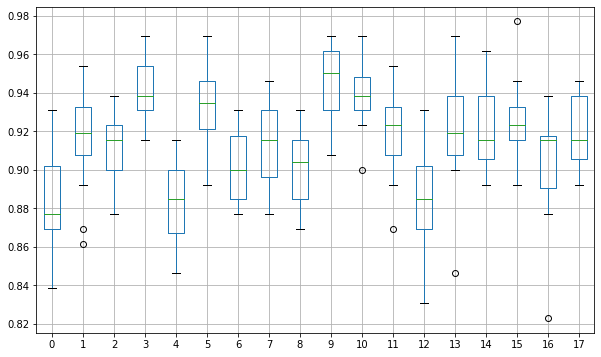

In [4]:
channels_df.boxplot(figsize=(10, 6))
channels_df.describe().transpose().sort_values(by='mean', ascending=False)